
## Questions:

## 1) Before you have a look at the subscription_periods table, what do you understand about the business, what do you think are the important metrics to analyze, and how would you measure them?


A) The business in short is a: secure e-presence legal-biding paperless document signature autorization plateform.

B) Given the relatively early state of the company and its status as an 'early adopters' plateform; the most important focus is on growth to gain maximum market share (exploration rather than explotation). 

This is translated to the following KPIs (3 by category): 

1) Keep inflow growing :
    - Count New Registrations, trials, Premium - by month
    - Conversion rates  - depending on the timing of the trial (proportion of new subscribers at end of the month)
    - Churn Rate - by month (proportion of leavers at the end of the month)
    

2) Customer satisfaction :
    - Purchase Frequency ( total orders / total unique custormers).
    - Net promoter score ( 0-6 detractors, 7-8 passive, 9-10 Promoter. (count promoters — count detractors) / (total users responding) x 100
    - Complain/more info request ratio.   (total cases / total users) x 100
    - Active Users (count users have done any action within a period of time: month, weekly or daily).

To keep a check on the health of the company i will also add :

3) Revenue :
    - Gross Profit
    - Average order Value
    - Customer Lifetime Value (customer annual spend x expected customer stay) –  customer cost of acquisition

## 2) Using the SQL engine of your choice, have a look at the dataset, what assumptions can you make about our business rules, and the general quality of the data provided?


#### Observations:

1) The table is abreviated, thus the necesity to have an additional calendar day table.
2) Customer_id and subscription_id are encripted. why is subscription encripted? 
3) A customer can have several subscriptions and a subscription_id can refeer to several PLAN_IDs, that start and end at different dates with different monthly amounts. This last one is not a good idea for locating the subscription to a specific plan, maybe there is a better table for this.
    - Best example for this problem is the customer= '00c2d0254d533e10d6c7aa2d94b2481c621ff495e457e566d1f0ea7fe9fa82f9' that has 11 subscriptions
    - from which the subscription ('fa3f04b857630c555272457d264b45d5c46e72c62b157e6876487c6240fa7b2b') has 2 different plans that start and end in different dates.
    - -> please check the datacheck notebook and sql file.

#### Quality of data:

There are 5063 recods with:
- No missing values.
- No duplicate rows.
- 3 types variables : 3 categorical 2 datetime 1 numerical
- 1 error: line 815, the end date is  572 days before the start date (fixed by hand)

- The MONTHLY_AMOUNT:
    - 2.3% of zeros (16 out of 30 plans have at least one plan with zero as monthly amount, is this normal?)
    - There vast majority of deals are under 880 (95th percentile ) then it shoots up.
  


## 3) A customer "churned" today if the customer paid for a subscription last day, but today he or she doesn't. A customer can churn many times.

### ● How many customers churned during June 2020?



> We assume a churner for june is someone that is present in any day of june (or last day of may) and is no longer present at the last day of june.
>  1) dummy_1 = min present day
>  2) dummy_2 = 30 june presence
    
>    - if a == 1 and b == 1 then stayer
>    - if a == 0 then not churner not present
>    - if a ==1 and b ==0 then churner

> sum churners.

> Please see answer on SQL in the SQL file.
 
> ==>The answer is 70  

### ● What is the evolution of the churned amount (revenue loss) over 2020?


> Please see answer on SQL in the SQL file.

> Formula  =  SUM(churn days x average monthly revenue in the month).

>  ===> After March the trend is going down.

> NB: The contracts intake stops at '2020-09-17', thus the dead drop from that month!


In [6]:
import pandas as pd
import seaborn as sns

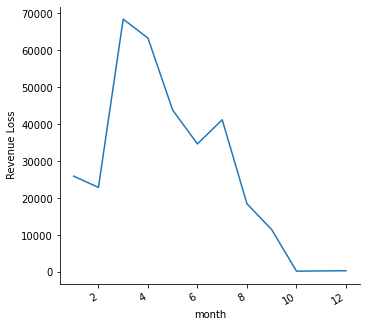

In [12]:
g = sns.relplot(x="month", y=" Revenue Loss", kind="line", data= pd.read_csv("rev_los.csv"))
g.fig.autofmt_xdate()


### ● What are your leads, what action can be taken to identify the cause of such evolution?



First look at the main variables.
The churn revenue loss has 3 main variables:
    
- Volume (user contracts)
- Monthly price
- Days of absence (which is turn is increased/decreased by the Monthly price.    
    
Then make hypothesis on them such as:

- Users quantity per month (maybe we have less users and thus less Loss?)
- Decrease of absence (maybe users dont leave so much as before... why?)
- Contract lenght per month ( maybe we have )
- Avg Churn days per user
- The best thing is to continue this with a bonefish diagram
 
Is also important to check the assumptions such as: 

- The change in the offer.
- The change in the default duration of offer.
- The Data (meaning the pipes are still arriving to the tables).
- The concurrence offering ( better price?, promotion?, service?, ..etc.).
- The Cannibalization of offers.
- Do customers believe the service is unreliable and churn after a period?
- Do Users can live witouth paying and can overpass the subscription? (Winrar example)

__NB the contracts intake stops at '2020-09-17', thus the dead drop from that month__
